# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

# Generate Random Banking Dataset to check custom is default or not

In [2]:
# Setting random seed for reproducibility
np.random.seed(42)

# Number of data points
n_points = 1000

# Number of features
n_features = 30

# Meaningful feature names
feature_names = [
    'balance', 'num_transactions', 'credit_score', 'age', 'income', 
    'loan_amount', 'savings', 'investment', 'debt', 'num_credit_cards', 
    'mortgage', 'loan_term', 'employment_years', 'account_age', 'expenses',
    'credit_utilization', 'payment_history', 'credit_limit', 'interest_rate', 
    'loan_type', 'region', 'marital_status', 'num_dependents', 'education_level', 
    'employment_status', 'home_ownership', 'phone_type', 'internet_banking', 
    'mobile_banking', 'branch_visits'
]

# Generating random features
X = np.random.randn(n_points, n_features)

# Generating target classes (0 or 1) to simulate binary classification in the banking sector
# For instance, 0: Default, 1: Non-Default
y = np.random.choice([0, 1], size=n_points)

# Creating a DataFrame to hold the data
data = pd.DataFrame(X, columns=feature_names)
data['default'] = y

In [3]:
data.head(5)

,balance,num_transactions,credit_score,age,income,loan_amount,savings,investment,debt,num_credit_cards,...,marital_status,num_dependents,education_level,employment_status,home_ownership,phone_type,internet_banking,mobile_banking,branch_visits,default
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,...,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,1
1,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,...,-0.385082,-0.676922,0.611676,1.031000,0.931280,-0.839218,-0.309212,0.331263,0.975545,1
2,-0.479174,-0.185659,-1.106335,-1.196207,0.812526,1.356240,-0.072010,1.003533,0.361636,-0.645120,...,0.357113,1.477894,-0.518270,-0.808494,-0.501757,0.915402,0.328751,-0.529760,0.513267,1
3,0.097078,0.968645,-0.702053,-0.327662,-0.392108,-1.463515,0.296120,0.261055,0.005113,-0.234587,...,-0.026514,0.060230,2.463242,-0.192361,0.301547,-0.034712,-1.168678,1.142823,0.751933,1
4,0.791032,-0.909387,1.402794,-1.401851,0.586857,2.190456,-0.990536,-0.566298,0.099651,-0.503476,...,1.307143,-1.607483,0.184634,0.259883,0.781823,-1.236951,-1.320457,0.521942,0.296985,0


# Model Training: SVM

In [4]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[feature_names], data['default'], test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating and training the SVM classifier with hyperparameter tuning
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
svm = SVC(random_state=42)
clf = GridSearchCV(svm, parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the classifier
print("Best parameters found:", clf.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Best parameters found: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       144
           1       0.52      0.56      0.54       156

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Accuracy Score:
0.5033333333333333


# Visualisation of datapoints

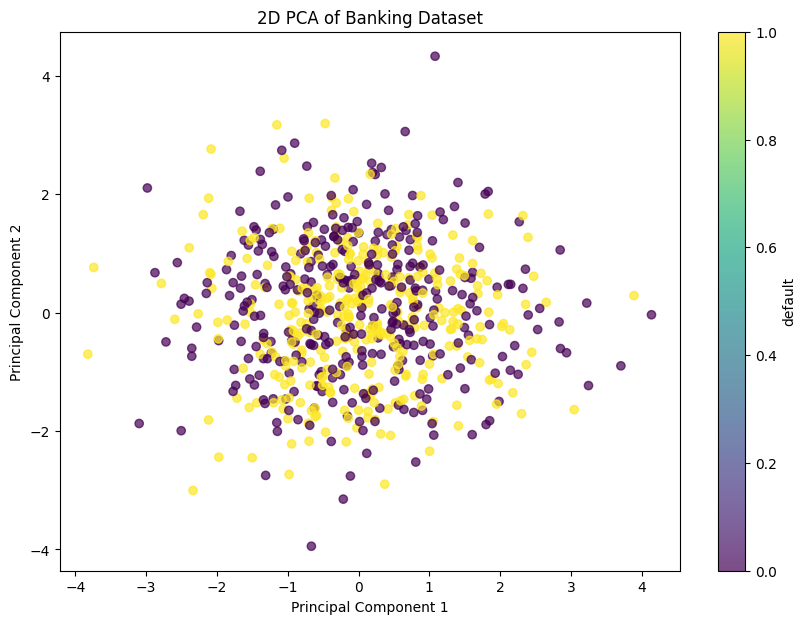

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reducing dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plotting the 2D PCA
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='default')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Banking Dataset')
plt.show()